# International Monetary Fund

(58725, 42)
Number of components for 90% variance: 13
Number of components for 95% variance: 18
Explained variance ratio per component:
[4.40358898e-01 1.19219849e-01 5.53875010e-02 5.13095130e-02
 4.86392366e-02 3.88315905e-02 2.77900860e-02 2.64634479e-02
 2.38739768e-02 2.19573904e-02 1.98711112e-02 1.73983701e-02
 1.56851140e-02 1.17898344e-02 1.15665712e-02 1.00945160e-02
 8.03711702e-03 7.12401943e-03 5.86171583e-03 5.53962347e-03
 4.93068339e-03 4.09875049e-03 3.46468332e-03 2.87889744e-03
 2.72350065e-03 2.37707377e-03 2.13034205e-03 1.54344765e-03
 1.44639725e-03 1.38387365e-03 1.19528124e-03 9.91300989e-04
 7.97495965e-04 7.78471807e-04 7.16656686e-04 6.05309001e-04
 5.24848492e-04 3.66270346e-04 2.47234066e-04]


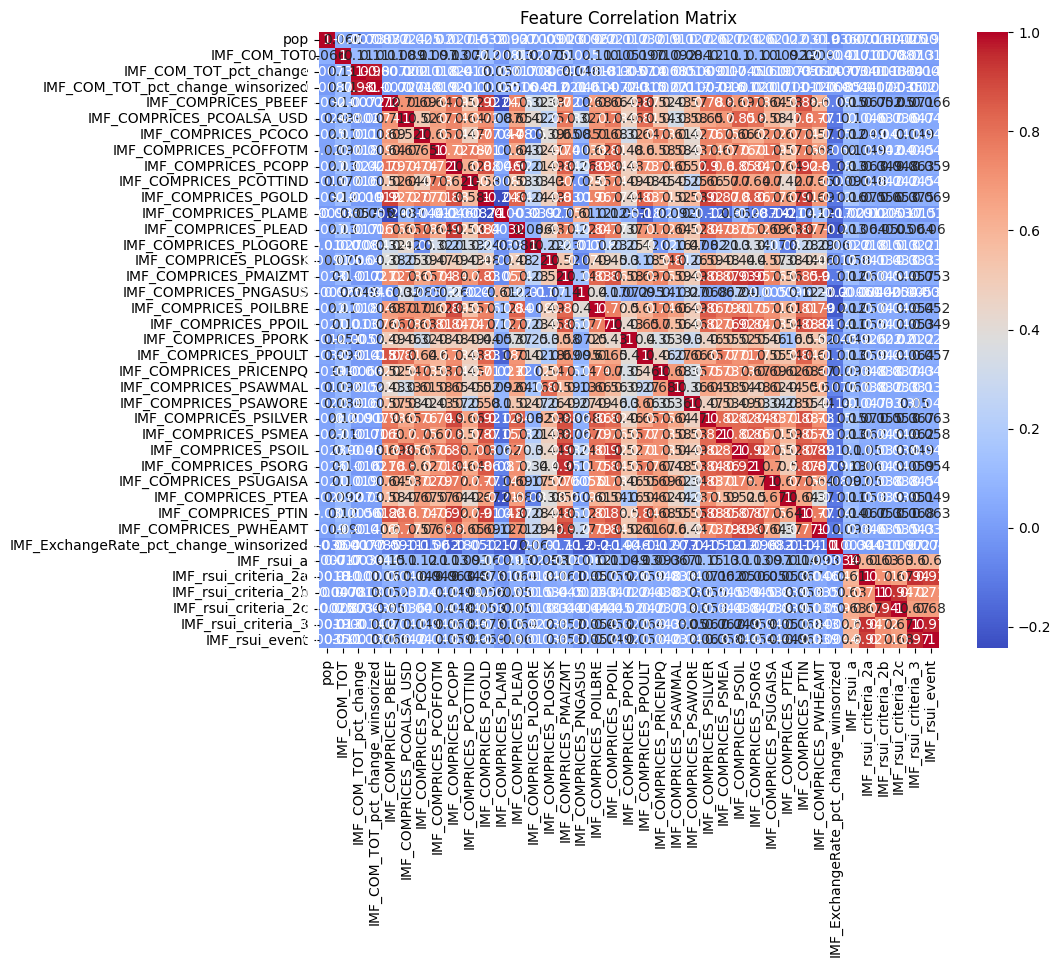

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('IMF.csv')
print(df.shape)
# Drop non-numeric/categorical identifiers
df_clean = df.drop(columns=['iso3', 'yearmon', 'region_code'])

# Drop rows with missing values
df_clean = df_clean.dropna()

# Standardize data (mean=0, std=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Fit PCA with all components on scaled data
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance ratio
cum_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components to reach 90% and 95% variance
n_components_90 = np.argmax(cum_variance >= 0.90) + 1
n_components_95 = np.argmax(cum_variance >= 0.95) + 1

print(f"Number of components for 90% variance: {n_components_90}")
print(f"Number of components for 95% variance: {n_components_95}")

print("Explained variance ratio per component:")
print(pca.explained_variance_ratio_)

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()



In [7]:
df_clean.shape

(31200, 39)

In [8]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
IMF_rsui_event,22519,38.35
IMF_rsui_criteria_3,22519,38.35
IMF_rsui_a,22519,38.35
IMF_rsui_criteria_2a,22519,38.35
IMF_rsui_criteria_2b,22519,38.35
IMF_rsui_criteria_2c,22519,38.35
IMF_ExchangeRate_pct_change_winsorized,8003,13.63
IMF_COM_TOT_pct_change_winsorized,7469,12.72
IMF_COM_TOT_pct_change,7469,12.72
IMF_COM_TOT,7205,12.27


FEATURE LOADINGS

In [4]:

import matplotlib.pyplot as plt

import pandas as pd

# pca.components_ is shape (n_components, n_features)
# Each row is a PC, each column is a feature loading

loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=df_clean.columns)

print("Feature loadings on principal components:")
print(loadings[['PC1', 'PC2', 'PC3', 'PC4']].sort_values(by='PC4',ascending=False).head(10))





Feature loadings on principal components:
                                        PC1       PC2       PC3       PC4
IMF_COM_TOT_pct_change_winsorized  0.001136 -0.001608  0.355404  0.461694
IMF_COM_TOT_pct_change             0.001538 -0.001453  0.357870  0.457009
IMF_COMPRICES_PTEA                 0.162549 -0.001441 -0.145113  0.226277
IMF_COMPRICES_PLOGSK               0.134128 -0.008640 -0.064121  0.201122
IMF_COMPRICES_PSAWMAL              0.162007 -0.015845  0.045119  0.179036
IMF_COMPRICES_PCOCO                0.191231 -0.009459 -0.048379  0.160405
IMF_COMPRICES_PRICENPQ             0.189027 -0.014495  0.000391  0.155845
IMF_COMPRICES_PSUGAISA             0.201578 -0.015105 -0.099837  0.146108
IMF_COMPRICES_PSILVER              0.224342 -0.006933 -0.066402  0.119470
IMF_COM_TOT                        0.031371 -0.000141  0.061379  0.117818


BIPLOT AND VARIANCE

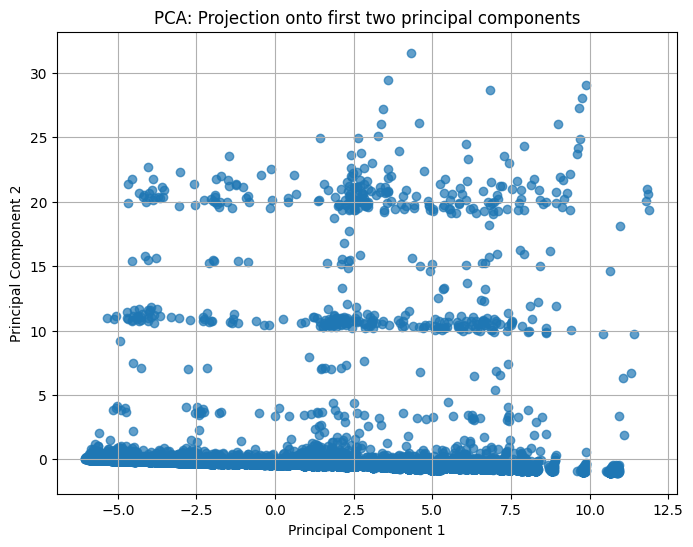

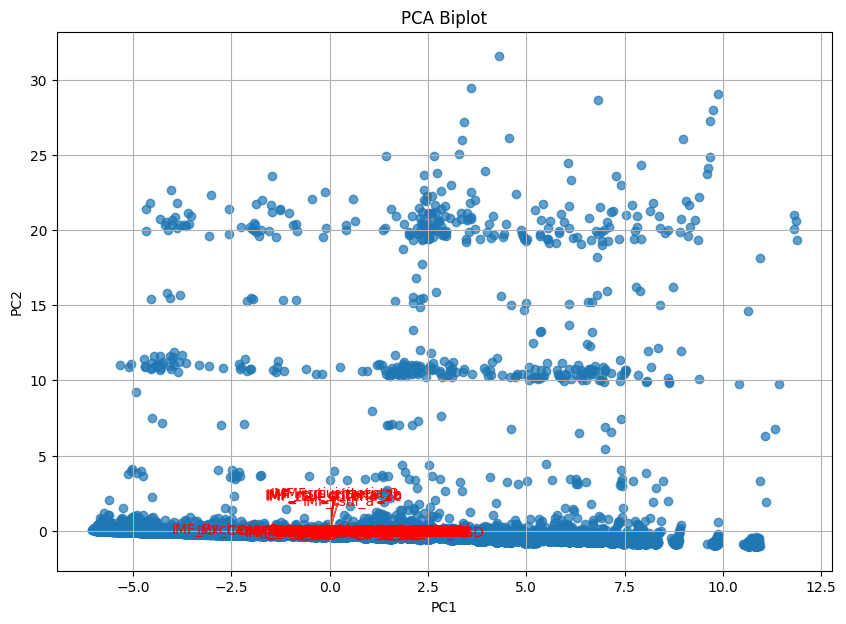

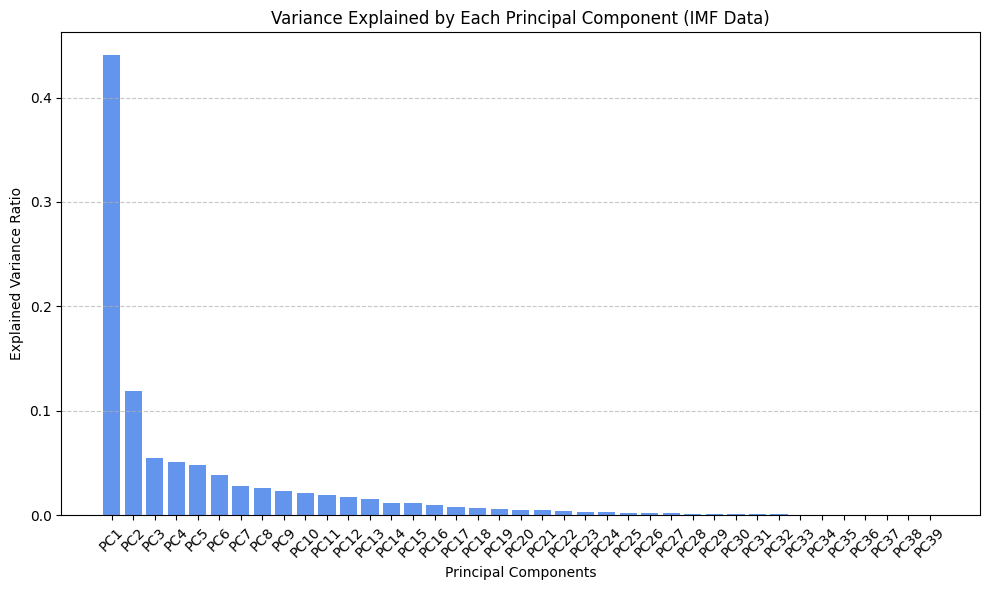

In [3]:

# Project data onto first two PCs
pc_scores = pca.transform(scaled_data)  # shape (n_samples, n_components)

plt.figure(figsize=(8,6))
plt.scatter(pc_scores[:,0], pc_scores[:,1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Projection onto first two principal components')
plt.grid(True)
plt.show()


def biplot(scores, loadings, labels=None):
    plt.figure(figsize=(10,7))
    xs = scores[:,0]
    ys = scores[:,1]
    plt.scatter(xs, ys, alpha=0.7)

    for i, feature in enumerate(loadings.index):
        plt.arrow(0, 0, loadings.iloc[i, 0]*5, loadings.iloc[i, 1]*5, 
                color='r', alpha=0.7, head_width=0.1)
        plt.text(loadings.iloc[i, 0]*5*1.15, loadings.iloc[i, 1]*5*1.15, feature, 
                color='r', ha='center', va='center')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.show()

biplot(pc_scores, loadings[['PC1', 'PC2']])

# Bar plot showing explained variance ratio per PC
plt.figure(figsize=(10, 6))
plt.bar(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
        height=pca.explained_variance_ratio_,
        color='cornflowerblue')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Variance Explained by Each Principal Component (IMF Data)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


PLOTTING FEW PCS

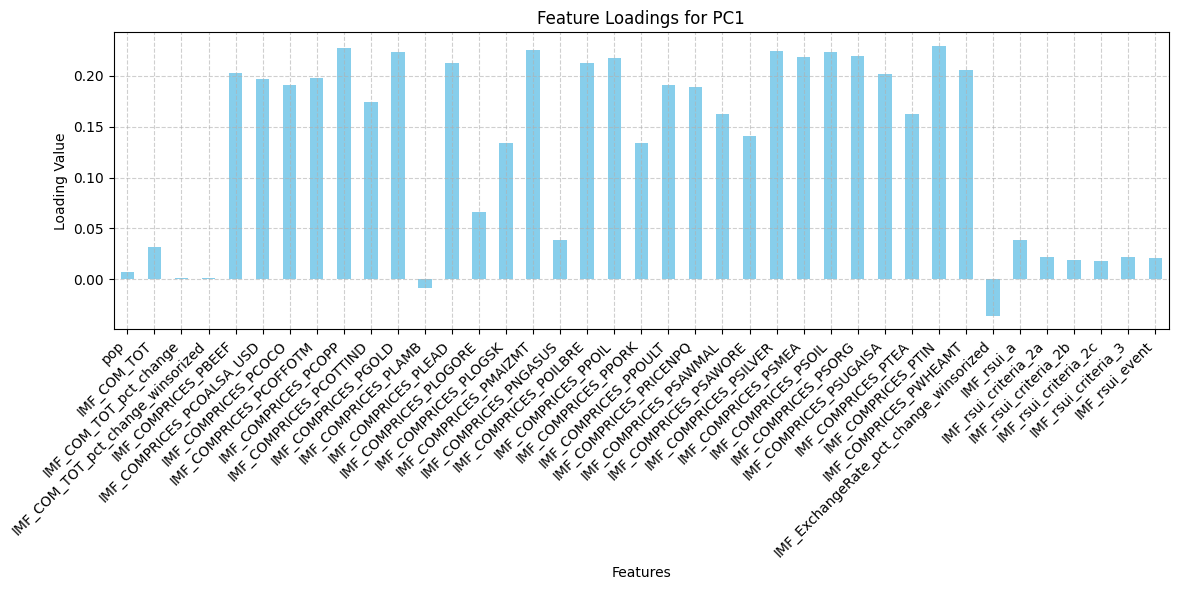

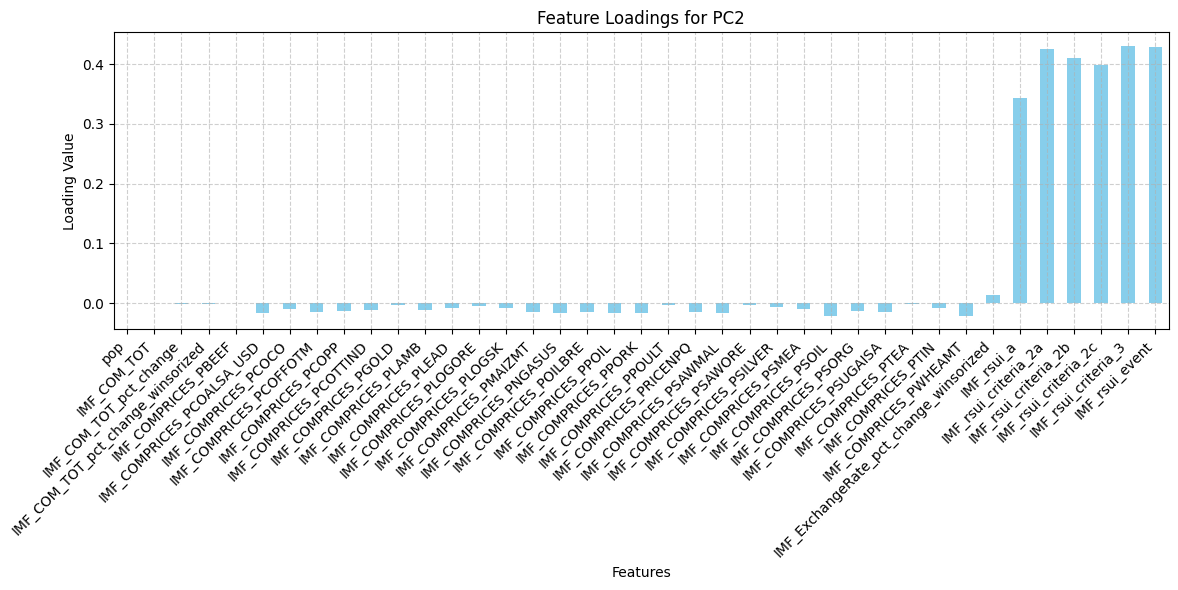

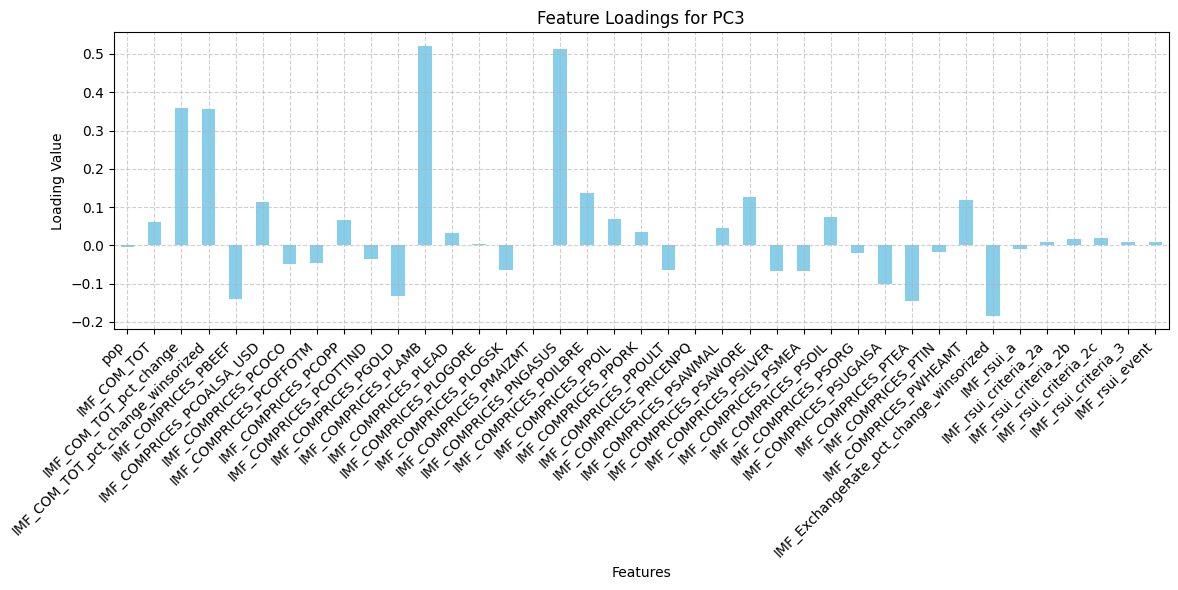

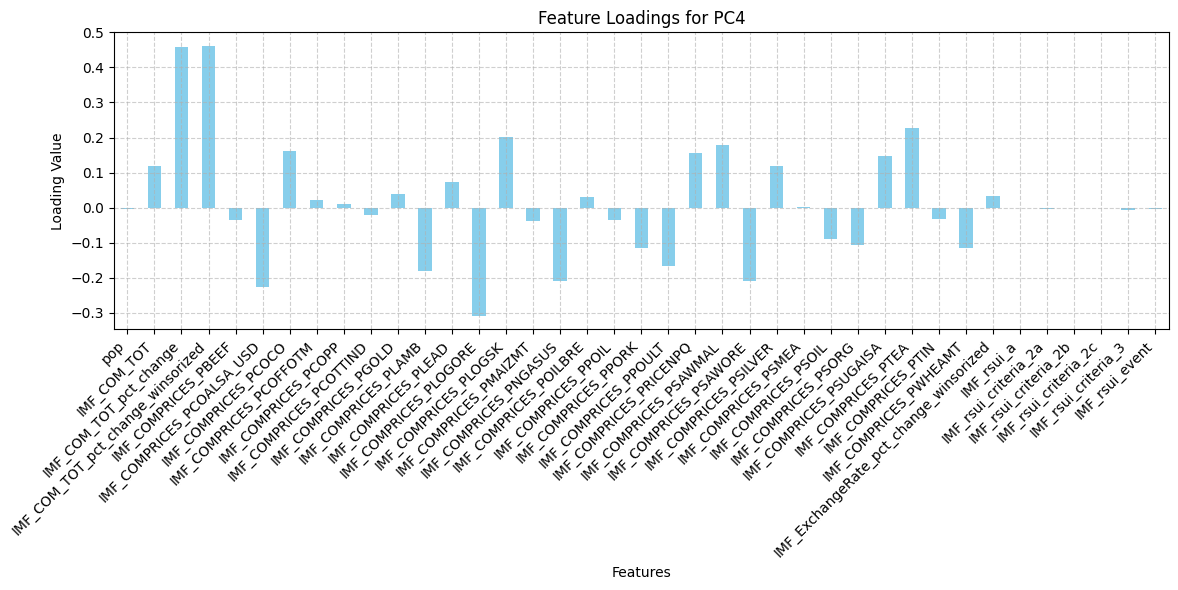

In [4]:


# Number of PCs to visualize (e.g., top 5)
num_pcs_to_plot = 4

# Plot bar graphs for each PC
for i in range(num_pcs_to_plot):
    pc = f'PC{i+1}'
    plt.figure(figsize=(12, 6))
    loadings[pc].plot(kind='bar', color='skyblue')
    plt.title(f'Feature Loadings for {pc}')
    plt.xlabel('Features')
    plt.ylabel('Loading Value')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    


Cumulative explained variance at component 4: 0.6663


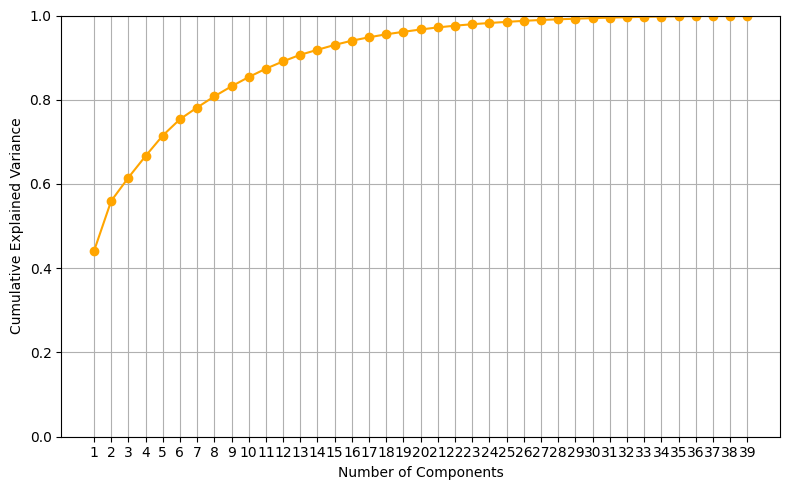

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 4 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


MAKING CSV

In [ ]:

# Project data onto principal components (you already have this as pc_scores)
pc_df = pd.DataFrame(pc_scores[:, :4], columns=[f'IMF_PC{i+1}' for i in range(4)])

# Add the corresponding iso3 values (must drop rows with NA just like df_clean)
iso3_cleaned = df['iso3'].loc[df_clean.index].reset_index(drop=True)
pc_df['iso3'] = iso3_cleaned

# Export to CSV
pc_df.to_csv('imf_pca_top4.csv', index=False)
print("✅ Saved IMF PCA Top 5 components with ISO3 to 'imf_pca_top5.csv'")


PHYSICAL INTERPRETATION
Principal Component 1 (PC1) can be interpreted as a Global Commodity Price Index, as it reflects broad-based price movements across major commodity categories including metals, oil, and agricultural goods. Strong loadings on variables such as tin, copper, gold, and wheat indicate that higher values of PC1 correspond to general increases in global commodity prices — making it a useful proxy for commodity inflation or global resource cost shifts.

Principal Component 2 (PC2) represents an IMF Risk and Surveillance Factor, capturing institutional assessments of economic risk. This component is driven by strong loadings from variables like IMF RSUI (Risk Signal Utility Index) criteria and event indicators. Higher values on this component likely correspond to periods of intensified IMF surveillance and early warning signals, indicating potential economic stress or increased institutional oversight.

Principal Component 3 (PC3) highlights Commodity Price Volatility, with strong contributions from recent changes in the terms of trade (TOT), as well as prices for commodities like natural gas and lamb. This component captures abrupt or sector-specific shocks, particularly in the energy and agriculture sectors, and reflects short-term price turbulence.

Principal Component 4 (PC4) is best described as a Terms of Trade-Driven Agricultural Growth Factor. It is heavily influenced by both the winsorized and raw percentage changes in the terms of trade, along with rising prices in agricultural and forestry commodities such as tea, cocoa, sugar, rice, and sawnwood. It also shows minor influence from precious metals like silver. PC4 reflects an environment where commodity-exporting nations — particularly those focused on soft commodities and timber — benefit from favorable global trade conditions.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 6
Column names for PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [7]:
pca_df = pd.DataFrame(X_pca, index=df_clean.index, columns=columns)

In [8]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

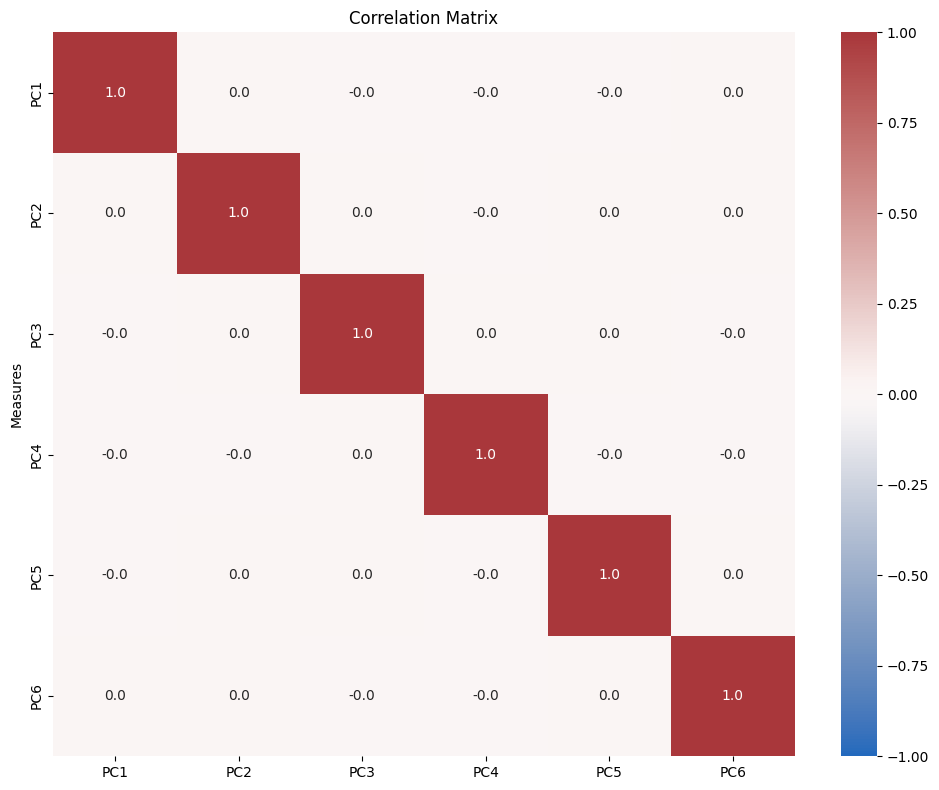

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()